In [ ]:
pip install -U fortran-magic

In [ ]:
%matplotlib inline
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>Jenny Alejandra Sanabria P:</h1>
  <h3><a href="https://github.com/jasanabriap/MetNumUN2020II">https://github.com/jasanabriap/MetNumUN2020II</a></h3>
</center>

# Un poco de mí, Alejandra:


- Estudiante de ingeniería agrícola
- Me gustan las artes plásticas
- Uso una bici libre color lila
- En este github están todos mis proyectos que hice d la clase Métodos Numéricos

#Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 88, 99, 55, "one"]
l

[1, 'two', 88, 99, 55, 'one']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: one
second to last: 55


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:4]
sublist

['two', 88, 99]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:4]
first_three

[1, 'two', 88, 99]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[2:]
after_three

[88, 99, 55, 'one']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'l', 'e', 'j', 'a', 's', 'a','0']
l[1:7:2]

['l', 'j', 's']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [34, 23, 67, 45, 89]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [34, 23, 67, 45, 89]
After: [34, 23, 67, 45, 89, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [6, 9, 3, 4, 8]
[x * 2 for x in l]

[12, 18, 6, 8, 16]

#Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'Dog': 'One', 'Cat': 'Three', 'Bunny': 'Five'}
philosophers

{'Bunny': 'Five', 'Cat': 'Three', 'Dog': 'One'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Cow'] = 'Seven'
philosophers

{'Bunny': 'Five', 'Cat': 'Three', 'Cow': 'Seven', 'Dog': 'One'}

In [ ]:
philosophers['Cow'] = 'Seven'
philosophers

{'Bunny': 'Five', 'Cat': 'Three', 'Cow': 'Seven', 'Dog': 'One'}

In [ ]:
del philosophers['Dog']
philosophers

{'Bunny': 'Five', 'Cat': 'Three', 'Cow': 'Seven'}

In [ ]:
# No slicing.
philosophers['Cow':'Cat']

TypeError: ignored

#Review: Python Dictionaries

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3758],
     [2, 356, 4],
     [58, 6, 7497],
     [3403, 1, 163]]

b = [[1, 24, 3, 784],
     [22, 3, 64, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 28 µs, sys: 6 µs, total: 34 µs
Wall time: 37 µs


[[45, 30, 131, 794],
 [7834, 1116, 22790, 3348],
 [190, 1410, 558, 45502],
 [3425, 81675, 10273, 2667957]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.681111129994225, 0.2742915796018415, 0.5850012545230261],
 [0.8467993325292381, 0.47638324525740217, 0.12649596622804038]]

In [ ]:
%%time
randa = random_matrix(200, 10)
randb = random_matrix(10, 200)
x = matmul(randa, randb)

CPU times: user 83 ms, sys: 0 ns, total: 83 ms
Wall time: 82.8 ms


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.3 ms, sys: 832 µs, total: 12.2 ms
Wall time: 18 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 98 µs, sys: 20 µs, total: 118 µs
Wall time: 121 µs


333328333350000.0

#Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([11, 2, 33, 4], [1, 6 + 0j, 2.0, 'five'])
#[type(x) for x in _]

[11, (12+0j), 66.0, 'fivefivefivefive']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


#Why is the Python Version so Slow?
> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

#What Do We Do?

In [ ]:
import numpy as np

data = np.array([9, 8, 7, 6])
data

array([9, 8, 7, 6])

In [ ]:
data + data

array([18, 16, 14, 12])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 1.39 ms, total: 1.39 ms
Wall time: 885 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.19 ms, sys: 0 ns, total: 1.19 ms
Wall time: 692 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 146 µs, sys: 0 ns, total: 146 µs
Wall time: 151 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "must be int"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(5)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(4, 4)
two_by_two

ValueError: ignored

#What's in an Array?

In [ ]:
arr = np.array([5, 4, 8, 9, 7, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[5 4 8]
 [9 7 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x05\x00\x04\x00\x08\x00\t\x00\x07\x00\x06\x00'


#Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

#UFuncs

In [ ]:
data = np.arange(20).reshape(4, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]])

In [ ]:
# Comparison operations
(data % 4) == 0

array([[ True, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 4) == 0)

array([[ True, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[  30,   80,  130,  180],
       [  80,  255,  430,  605],
       [ 130,  430,  730, 1030],
       [ 180,  605, 1030, 1455]])

#Selections

In [ ]:
sines = np.sin(np.linspace(0, 2.72, 20))
cosines = np.cos(np.linspace(0, 2.72, 20))
sines

array([0.        , 0.14266941, 0.28241992, 0.41639234, 0.54184571,
       0.65621334, 0.75715537, 0.8426066 , 0.91081877, 0.96039631,
       0.9903249 , 0.99999224, 0.98920052, 0.95817055, 0.90753717,
       0.83833631, 0.75198374, 0.65024619, 0.53520512, 0.40921417])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[5]

0.6562133385653814

In [ ]:
sines[:2]  # First two elements  

array([0.        , 0.14266941])

In [ ]:
sines[6:]  # Elements from 6 on.

array([0.75715537, 0.8426066 , 0.91081877, 0.96039631, 0.9903249 ,
       0.99999224, 0.98920052, 0.95817055, 0.90753717, 0.83833631,
       0.75198374, 0.65024619, 0.53520512, 0.40921417])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.28241992, 0.54184571, 0.75715537, 0.91081877,
       0.9903249 , 0.98920052, 0.90753717, 0.75198374, 0.53520512])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 1.5)
print("sines[sines > 0.5]:\n", sines[sines > 1.5])

sines:
 [0.         0.14266941 0.28241992 0.41639234 0.54184571 0.65621334
 0.75715537 0.8426066  0.91081877 0.96039631 0.9903249  0.99999224
 0.98920052 0.95817055 0.90753717 0.83833631 0.75198374 0.65024619
 0.53520512 0.40921417]
sines > 0.5:
 [False False False False False False False False False False False False
 False False False False False False False False]
sines[sines > 0.5]:
 []


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[1, 0, 3]]

[0.         0.14266941 0.28241992 0.41639234 0.54184571 0.65621334
 0.75715537 0.8426066  0.91081877 0.96039631 0.9903249  0.99999224
 0.98920052 0.95817055 0.90753717 0.83833631 0.75198374 0.65024619
 0.53520512 0.40921417]


array([0.14266941, 0.        , 0.41639234])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1385, 3204, 2495, 1234, -8921, 4925, 2945])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 3, 0, 2, 6, 1, 5])

In [ ]:
unsorted_data[sort_indices]

array([-8921,  1234,  1385,  2495,  2945,  3204,  4925])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'L', 'E', 'J', 'A'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['J', 'L', 'A', 'E', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [ ]:
data = np.arange(16).reshape(4, 4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [4, 5]])

In [ ]:
data[:-2, [1, 0]]  # Last two rows, second and first columns.

array([[1, 0],
       [5, 4]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## Reductions


In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(50000))

1.0048583658047263

In [ ]:
data = np.arange(20)
data.mean()

9.5

In [ ]:
data = np.arange(20).reshape(2, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [ ]:
data.mean()

9.5

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5])

In [ ]:
data.mean(axis=0)

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.])

## Broadcasting


In [ ]:
row = np.array([3, 7, 4, 9])
column = np.array([[5], [6], [7]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[3 7 4 9]
Column:
[[5]
 [6]
 [7]]


In [ ]:
row + column

array([[ 8, 12,  9, 14],
       [ 9, 13, 10, 15],
       [10, 14, 11, 16]])

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
Mean:
[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
Data - Mean:
[[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]]


## Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'l', 'e', 'j', 'a'], data=[8, 7, 6, 5, 4])
s

a    8
l    7
e    6
j    5
a    4
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'l', 'e', 'j', 'a'], dtype='object')
The values are: [8 7 6 5 4]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[4]

4

In [ ]:
# ... or by label.
s.loc['a']

a    8
a    4
dtype: int64

In [ ]:
# Slicing works as expected...
s.iloc[:3]

a    8
l    7
e    6
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'e']

a    8
l    7
e    6
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    8
a    4
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

a    8
l    7
e    6
j    5
a    4
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 5.0, 'c': 10.0, 'd': 15.0, 'z': 20.0})
other_s

a     5.0
c    10.0
d    15.0
z    20.0
dtype: float64

In [ ]:
s + other_s

a    13.0
a     9.0
c     NaN
d     NaN
e     NaN
j     NaN
l     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    13.0
a     9.0
c     0.0
d     0.0
e     0.0
j     0.0
l     0.0
z     0.0
dtype: float64

#A CAT

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded =  files.upload()


Saving Cat.jpg to Cat.jpg


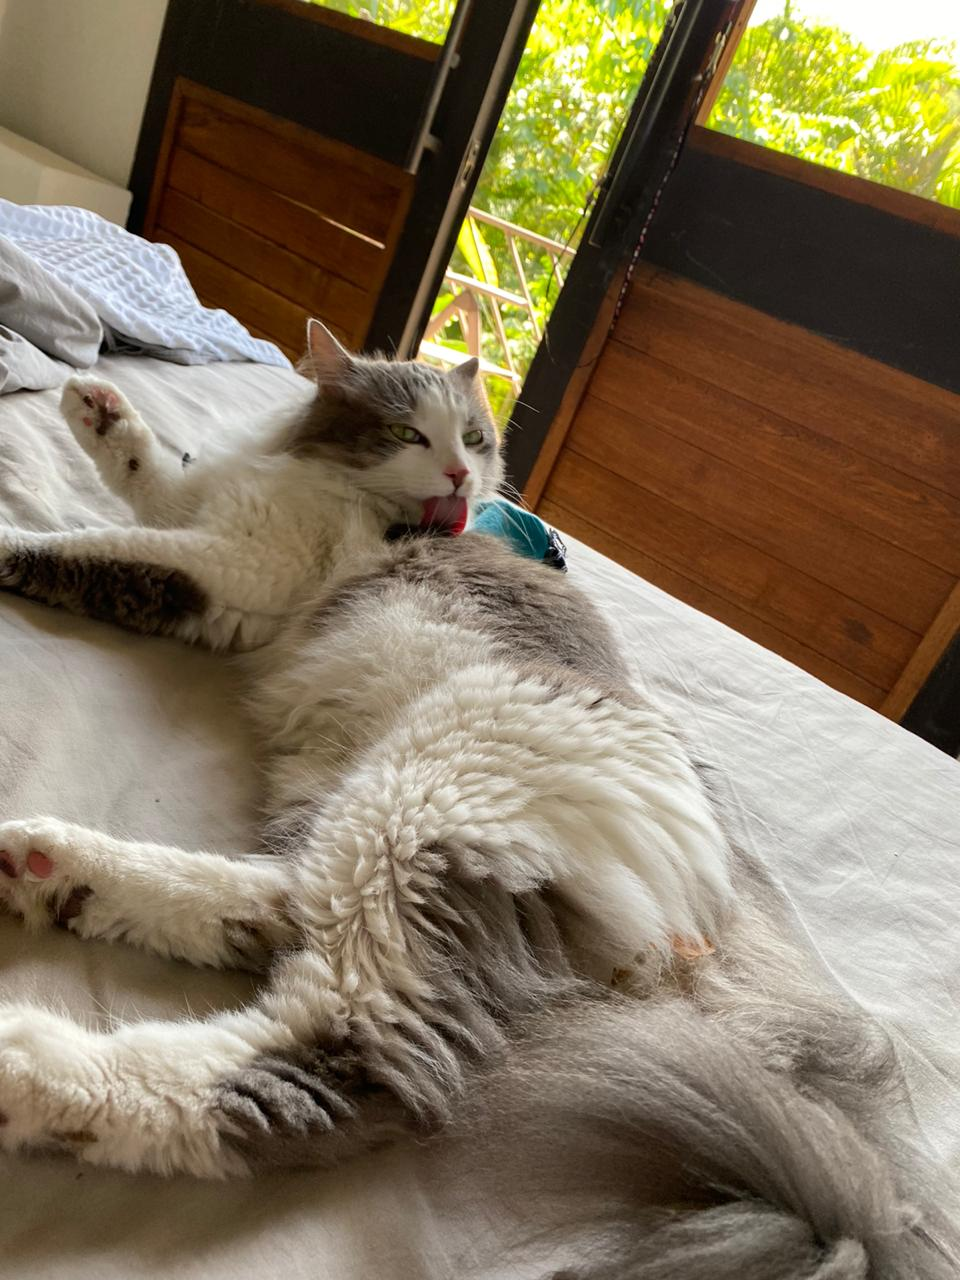

In [ ]:
Image('Cat.jpg', width=300)